In [51]:
import pandas as pd
import numpy as np
import os
import git
import pickle
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', -1)
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [52]:
## Read the labelled files and the poly_user
def get_git_root(path):
	git_repo = git.Repo(path, search_parent_directories=True)
	git_root = git_repo.git.rev_parse("--show-toplevel")
	return git_root

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder as le
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder 
from sklearn.utils import shuffle

In [54]:
from keras.preprocessing.sequence import pad_sequences
from keras.optimizers import SGD
from keras.models import Model, Input
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Bidirectional
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import Reshape
from keras.layers import Average
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import keras
from keras.layers import Dropout
from sklearn.model_selection import GridSearchCV

In [55]:
top_dir = os.path.join(get_git_root(os.getcwd()))
df_tweets = pd.read_csv(os.path.join(get_git_root(os.getcwd()),"input","labelled_data","tweets_predicted.csv"), lineterminator="\n", index_col=0)

In [56]:
poly_dir = os.path.join(top_dir,"models","poly_wrt") ## to change
poly_users = pickle.load(open(os.path.join(poly_dir,"poly_users.pkl"),"rb"))
normal_users = pickle.load(open(os.path.join(poly_dir,"normal_users.pkl"),"rb"))

In [57]:
mono_users = list(set(normal_users) - set(poly_users))

In [58]:
poly_tweets = df_tweets.loc[df_tweets.userID.isin(poly_users)]

In [59]:
mono_tweets = df_tweets.loc[df_tweets.userID.isin(mono_users)]

In [60]:
import nltk
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/samarthgoal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/samarthgoal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [61]:
import re
def clean_text(text):
    text = re.sub(r'(#)', "",text) ## removing the hashtags signal 
    text = re.sub(r'(RT \w+:)', "",text) ## remove the retweet info as they dont convey any information
    text = re.sub(r'(author)',"",text)
#     text = re.sub(r'')
    text.rstrip
    text.lstrip
    return(text)

In [62]:
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma

In [63]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
def get_tokens(sentence):
    tokens = tknzr.tokenize(sentence)
    tokens = [token.lower() for token in tokens if (token not in stopwords and token.isalpha())] # stopwords removal
    tokens = [get_lemma(token) for token in tokens]  # lemmatization
    return (tokens)

In [64]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
def clean_tkz(sentence):
    tokens = tknzr.tokenize(sentence)
    tokens = [token.lower() for token in tokens if (token not in stopwords and token.isalpha())] # stopwords removal
    tokens = [get_lemma(token) for token in tokens]  # lemmatization
    return (" ".join(tokens))

In [65]:
def get_tokens_length(sentence):
    tokens = tknzr.tokenize(sentence)
    return (len(tokens))

In [66]:
## cleaning the text
poly_tweets["tweetText"] = poly_tweets["tweetText"].apply(clean_text)
mono_tweets["tweetText"] = mono_tweets["tweetText"].apply(clean_text)

/home/samarthgoal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/samarthgoal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
## tokenizing and lemmatizing
poly_tweets["tweetText"] = (poly_tweets["tweetText"].apply(clean_tkz))
mono_tweets["tweetText"] = mono_tweets["tweetText"].apply(clean_tkz)

/home/samarthgoal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/samarthgoal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
### sentence level ..
poly_tweets["poly_mono"] = "poly"
mono_tweets["poly_mono"] = "mono"

/home/samarthgoal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/samarthgoal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [69]:
frames = [poly_tweets, mono_tweets]
df_final_tweets = pd.concat(frames)
df_final_sentences = df_final_tweets[['tweetText','poly_mono']]

In [70]:
## bilstm --model 
## glove embeddings
# check the max average tweets for each user

In [71]:
len(df_final_tweets.userID.unique())

2157

In [72]:
no_tweets = list()
for user in list(df_final_tweets.userID.unique()):
    tweets =(df_final_tweets.loc[df_final_tweets.userID == user])
    no_tweets.append((user,len(tweets)))
df_user = pd.DataFrame(no_tweets, columns=["userID","len_tweets"])
df_user = df_user.sort_values(by="len_tweets",ascending=True)

In [73]:
users = df_user.userID.unique()
i = 0
users_no = dict()
users_no[0] = 0
## sorted non-decreasing list  
for idx,element in df_user.iterrows():
    if (element["len_tweets"] < (i + 1)):
        users_no[i] += 1 
    else:
        i = i + 1
        users_no[i] = 1

In [159]:
len(users)

2157

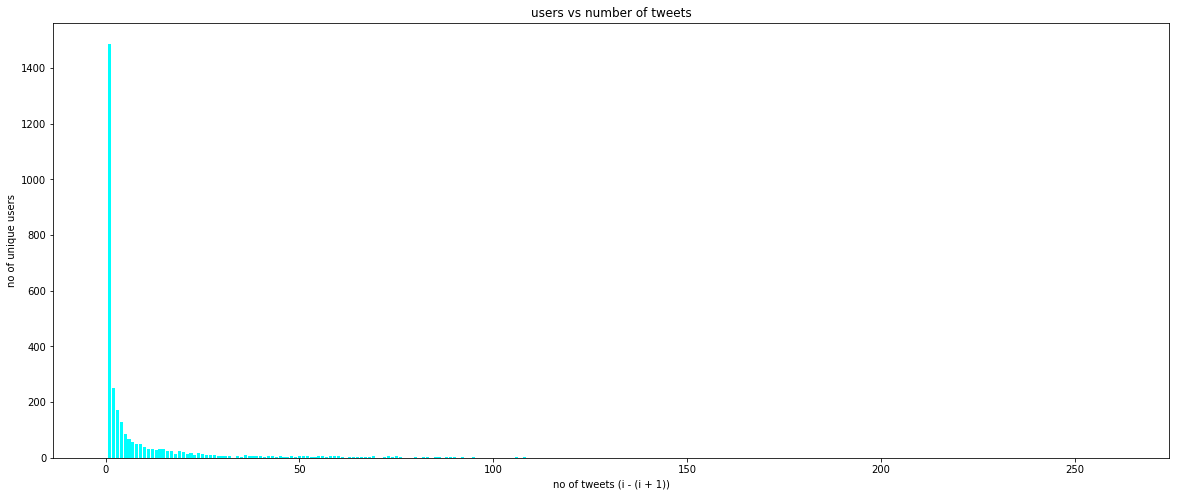

In [93]:
## poly users
plt.figure(figsize= (20,8))
plt.bar(users_no.keys(), users_no.values(), color= "cyan")
plt.xlabel("no of tweets (i - (i + 1))")
plt.ylabel("no of unique users")
plt.title("users vs number of tweets")
plt.show()

In [94]:
## combining all tweets of each user as most of the user have one tweet and there exists at least one tweet fro each user

In [26]:
def get_tweets_user(df):
    df_tweets_comb = list()
    users = df.userID.unique()
    for user in users:
        tweets =(df.loc[df.userID == user])
        if (len(list(tweets["tweetText"])) > 0):
            tweets_f = (" . ".join((tweets["tweetText"])))
            df_tweets_comb.append((user,tweets_f))
    df_user = pd.DataFrame(df_tweets_comb, columns=["userID","tweetText"])
    return (df_user)

In [ ]:
poly_tweets_user = get_tweets_user(poly_tweets)
mono_tweets_user = get_tweets_user(mono_tweets)
poly_tweets_user['label'] = "poly"
mono_tweets_user['label'] = "mono"
frames = [poly_tweets_user, mono_tweets_user]
df_concat_tweets = pd.concat(frames)

In [ ]:
tweet_legth_poly = list(poly_tweets_user["tweetText"].apply(clean_tkz))      

In [ ]:
tweet_legth_mono = list(mono_tweets_user["tweetText"].apply(clean_tkz))      

In [165]:
tweet_legth_gen = list(df_concat_tweets["tweetText"].apply(clean_tkz))      

In [ ]:
print("median_legth_combined",np.median(tweet_legth_gen))
print("avg legth of combines ", np.mean(tweet_legth_gen))

In [ ]:
print("median_legth_poly",np.median(tweet_legth_poly))
print("avg legth of poly ", np.mean(tweet_legth_poly))

In [ ]:
print("median_legth_mono",np.median(tweet_legth_mono))
print("avg legth of mono ", np.mean(tweet_legth_mono))

## sentence level

In [ ]:
## tokenize
# prepare the input: pad and fit
# prepare tokenizer
max_len = 15
tokenizer = Tokenizer()
tokenizer.fit_on_texts(list(df_final_tweets["tweetText"]))
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(list(df_final_tweets["tweetText"]))
X = pad_sequences(encoded_docs, maxlen=max_len, padding='post')
le = LabelEncoder()
le.fit(list(df_final_tweets["poly_mono"]))
y = le.transform(list(df_final_tweets["poly_mono"]))
X, y = shuffle(X, y, random_state=4)

In [ ]:
X.shape

(76585, 15)

In [ ]:
## train test split
X_train,X_test,Y_train,Y_test  = train_test_split(X, y,test_size =0.20,random_state= 4 )

## user level

In [74]:
len(df_concat_tweets)

2157

In [94]:
## tokenize
# prepare the input: pad and fit
# prepare tokenizer
token_list = df_concat_tweets["tweetText"].apply(get_tokens)
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(token_list)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(token_list)
# pad documents to a max length of 4 words
max_len = 15

In [95]:
vocab_size

40007

In [96]:
X = pad_sequences(encoded_docs, maxlen=max_len, padding='post')

In [97]:
X.shape

(2157, 15)

In [99]:
y = (list(df_concat_tweets['label']))
le = LabelEncoder()
le.fit(y)
y = le.transform(y)
le.classes_

array(['mono', 'poly'], dtype='<U4')

In [100]:
le.classes_

array(['mono', 'poly'], dtype='<U4')

In [101]:
## train test split
X_train,X_test,Y_train,Y_test  = train_test_split(X, y,test_size =0.20,random_state= 4 )

In [104]:
print(X_train.shape)
print(X_test.shape)

(1725, 15)
(432, 15)


### embeddings

In [105]:
import os
embeddings_dir  = os.path.join(get_git_root(os.getcwd()),"input","embeddings")
embedding_file = os.path.join(embeddings_dir,"glove.twitter.27B.100d.txt")

In [106]:
# create the word2vec dict from the dictionary
def get_word2vec(file_path):
    file = open(file_path, "r")
    if (file):
        word2vec = dict()
        split = file.read().splitlines()
        for line in split:
            key = line.split(' ',1)[0] # the first word is the key
            value = np.array([float(val) for val in line.split(' ')[1:]])
            word2vec[key] = value
        return (word2vec)
    else:
        print("invalid fiel path")

In [107]:
word2vec = get_word2vec(os.path.join(embeddings_dir,embedding_file))

In [108]:
# token_list = list(df_concat_tweets['tweetText'].apply(get_tokens))

In [110]:
## get the embedding matrix weights:
from numpy import zeros
embedding_matrix = zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    embedding_vector = word2vec.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [111]:
max_len= 15
Dimension = 100
n_words = vocab_size
input = Input(shape=(max_len,))
model = Embedding(n_words,Dimension,weights=[embedding_matrix],input_length=max_len)(input)
model =  Bidirectional (LSTM (100,return_sequences=True,dropout=0.50),merge_mode='concat')(model)
model = TimeDistributed(Dense(100,activation='relu'))(model)
model = Flatten()(model)
model = Dropout(0.20)(model)
model = Dense(100,activation='relu')(model)
model = Dropout(0.20)(model)
output = Dense(1,activation='sigmoid')(model)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [112]:
model = Model(input,output)

In [113]:
sgd = SGD(lr=0.1, momentum=0.9, decay=0.0, nesterov=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy']) 
# model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [114]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 15)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 15, 100)           4000700   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 15, 200)           160800    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 15, 100)           20100     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1500)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1500)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               150100    
__________

In [124]:
## pass the training data
model.fit(X_train,Y_train,validation_split=0.25, nb_epoch = 30, verbose = 3)

/home/samarthgoal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 1293 samples, validate on 432 samples
Epoch 1/30
Epoch 2/30
Epoch 3/30
Epoch 4/30
Epoch 5/30
Epoch 6/30
Epoch 7/30
Epoch 8/30
Epoch 9/30
Epoch 10/30
Epoch 11/30
Epoch 12/30
Epoch 13/30
Epoch 14/30
Epoch 15/30
Epoch 16/30
Epoch 17/30
Epoch 18/30
Epoch 19/30
Epoch 20/30
Epoch 21/30
Epoch 22/30
Epoch 23/30
Epoch 24/30
Epoch 25/30
Epoch 26/30
Epoch 27/30
Epoch 28/30
Epoch 29/30
Epoch 30/30


In [125]:
# evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test, verbose=2)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 75.231481


In [126]:
from sklearn.metrics import classification_report,confusion_matrix
temp = model.predict(X_test)
y_pred = [0 if value< 0.5 else 1 for value in temp] 
print('  Classification Report:\n',classification_report(Y_test,y_pred),'\n')

  Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.83       316
           1       0.53      0.61      0.57       116

   micro avg       0.75      0.75      0.75       432
   macro avg       0.69      0.71      0.70       432
weighted avg       0.76      0.75      0.76       432
 



In [123]:
from sklearn.metrics import classification_report,confusion_matrix
temp = model.predict(X_test)
y_pred = [0 if value< 0.5 else 1 for value in temp] 
print('  Classification Report:\n',classification_report(Y_test,y_pred),'\n')

  Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.82       316
           1       0.53      0.58      0.55       116

   micro avg       0.75      0.75      0.75       432
   macro avg       0.68      0.69      0.69       432
weighted avg       0.76      0.75      0.75       432
 

